# Metropolis Hasting

Este es un método MCMC que tiene dos pasos fundamentales.

- Paso 1. Proponer: Se busca crear una pertubarción estocástica del estado inicial q sugiriendo un nuevo estado q´

- Paso 2. Corregir: Se rechaza cualquier propuesta que se aleje demasido del conjunto típico

# Alguna formalidad Matemática

- Densidad de probabilidad objetivo (en estadística bayesiana esta función podría ser la forma posterior)
$$\pi(q)$$

- Densidad de probabilidad propuesta 
$$Q(q´|q)$$

- Probabilidad de aceptar
$$a(q'|q) = \min{\left(1,\frac{Q(q|q')\pi(q')}{Q(q'|q)\pi(q)}\right)}$$

- Tomando la forma de $Q(q'|q) ~ N(\mu_q,\Sigma)$, la probabiliad de aceptar se convierte en#
$$a(q'|q) = \min{\left(1,\frac{\pi(q')}{\pi(q)}\right)}$$


# Implementación

## Función objetivo

Ejecute la linea de la función que desee muestrear. Se presentan 3 ejemplos, una normal centrada en 10 y con sd 4, una función t-student con 8 grados de libertad y una función exponencial

In [ ]:
target = function(x){
  return(dnorm(x, mean=10, sd= 4))
}

In [ ]:
target = function(x){
  return(dt(x,8))
}

In [ ]:
target = function(x){
  if(x<0){
    return(0)}
  else {
    return( exp(-x))
  }
}

## Condiciones inciales

- ite = Número de iteraciones, largo de la cadena
- q[1] = Estado inicial

In [ ]:
ite = 10000
q <- rep(0,ite)
q[1] = 3  

## Algoritmo

In [ ]:
for(i in 1:(ite-1)){
  q0 = q[i]
  q1 = q0 + rnorm(1,mean=0,sd=10) #Q(q|q') ~ N(0,1)
  accept = target(q1)/target(q0)
  if(runif(1)<accept){
    q[i+1] = q1       
  } else {
    q[i+1] = q0
  }
}

## Gráficas

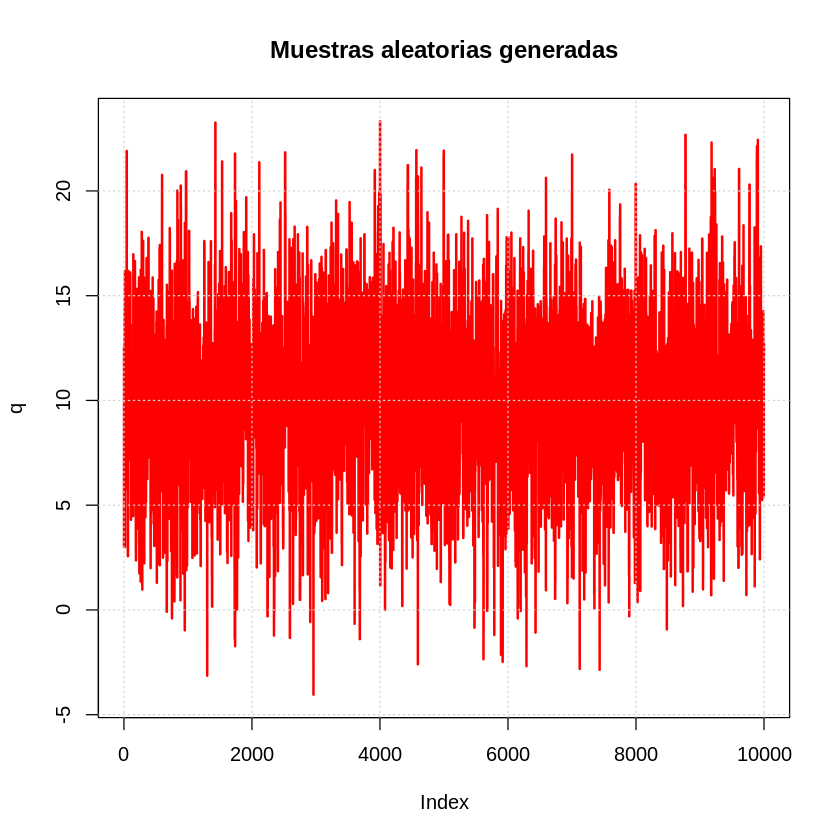

In [ ]:
plot(q, main='Muestras aleatorias generadas', type="l", col='red', lwd=2) 
grid()

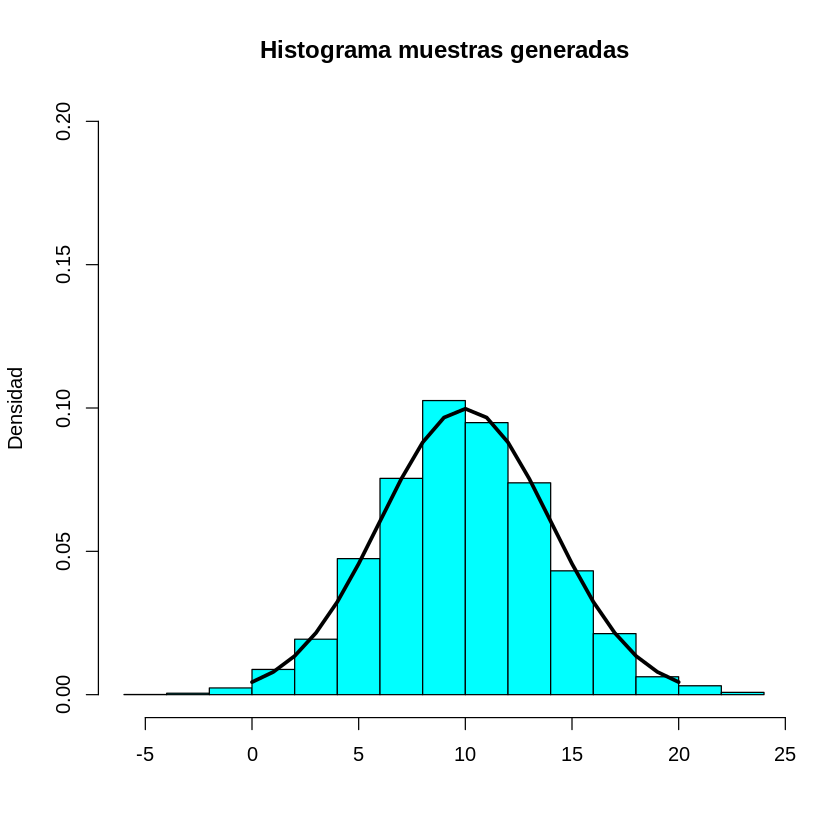

In [ ]:
x <- 0:0.5:20
y <- dnorm(x, 10, 4)
hist(q,freq=FALSE, col="cyan",ylim=c(0,0.2),
     main="Histograma muestras generadas",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))

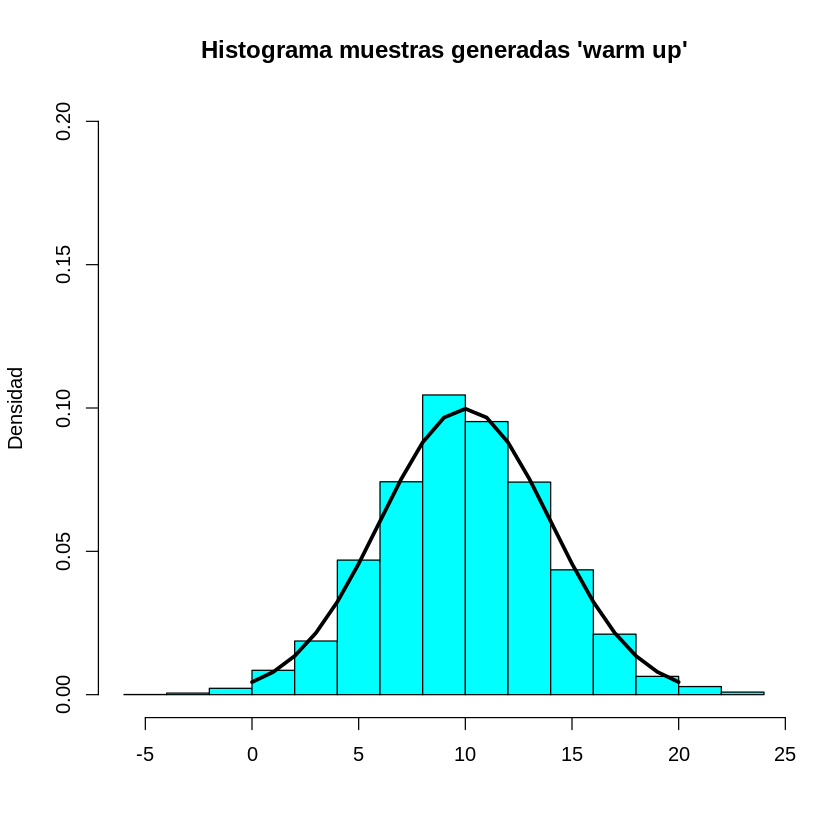

In [ ]:
x <- 0:0.5:20
y <- dnorm(x, 10, 4)
hist(q[1000:10000],freq=FALSE, col="cyan",ylim=c(0,0.2),
     main="Histograma muestras generadas 'warm up'",xlab="",ylab="Densidad")
     lines(x,y,lw=3, ylim=c(0,1))

# Normal Bivariada

## Función objetivo

In [ ]:
mx=0
my=0
s2x=1
s2y=1
corxy=0

target = function(x,y){
                    (1/(2*pi*sqrt(s2x*s2y*(1-corxy))))*
                    exp(-1/(2*(1-corxy^2))*
                    ((x-mx)^2/s2x+
                    (y-my)^2/s2y -
                     2*corxy*((x-mx)*(y-my))/
                      (sqrt(s2x)*sqrt(s2y))
                     )
                   )
             }

## Condiciones Iniciales

In [ ]:
# Punto de partida
a0 <- -10 
b0 <- 3 

ite <- 1000
a <- rep(0,ite)
b <- rep(0,ite)


a[1] <- a0
b[1] <- b0

## Algoritmo

In [ ]:
counter = 0 # monitor number of acceptances.
for( i in 1:(ite-1)) {
  
  new_step = c(a[i], b[i])+rnorm(2)
  r <- target(new_step[1],new_step[2])/target(a[i],b[i])
  
  if(runif(1) < r ) 
  {     
    a[i+1] <- new_step[1]
    b[i+1] <- new_step[2]
    counter = counter + 1;
  }
  else 
  {
    a[i+1] <- a[i]
    b[i+1] <- b[i]
  }
}

## Gráficas

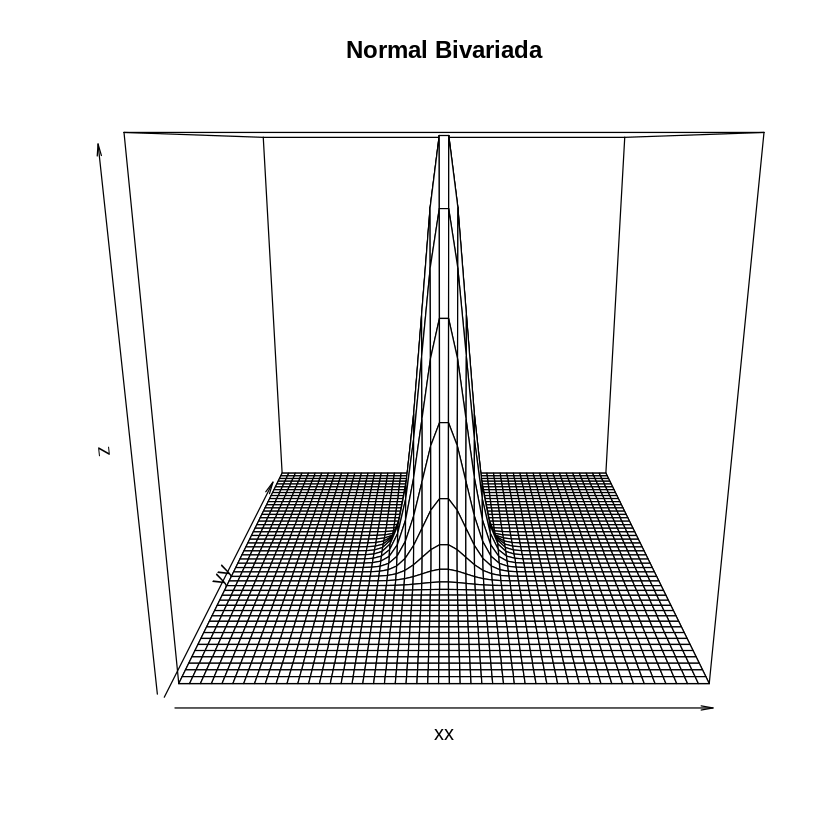

In [ ]:
xx <- seq(-10,10,length=50)
yy <- seq(-10, 10,length=50)
z = outer(xx, yy, target)
persp(xx,yy,z, main='Normal Bivariada')

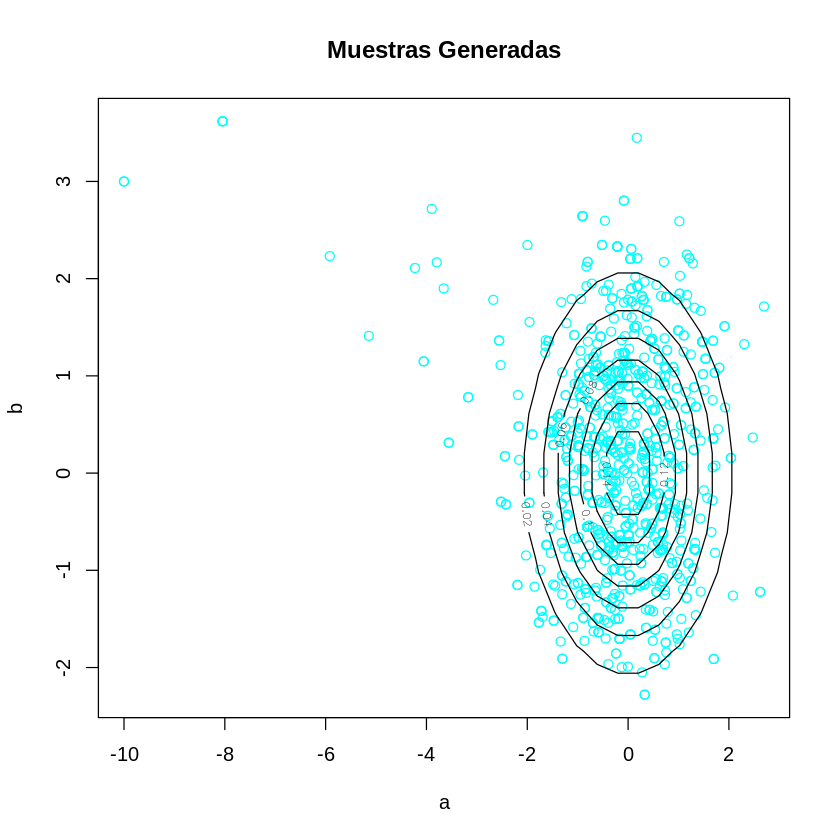

In [ ]:
plot(a,b, main='Muestras Generadas', col='cyan')
contour(xx, yy, z, 10,add = TRUE,)

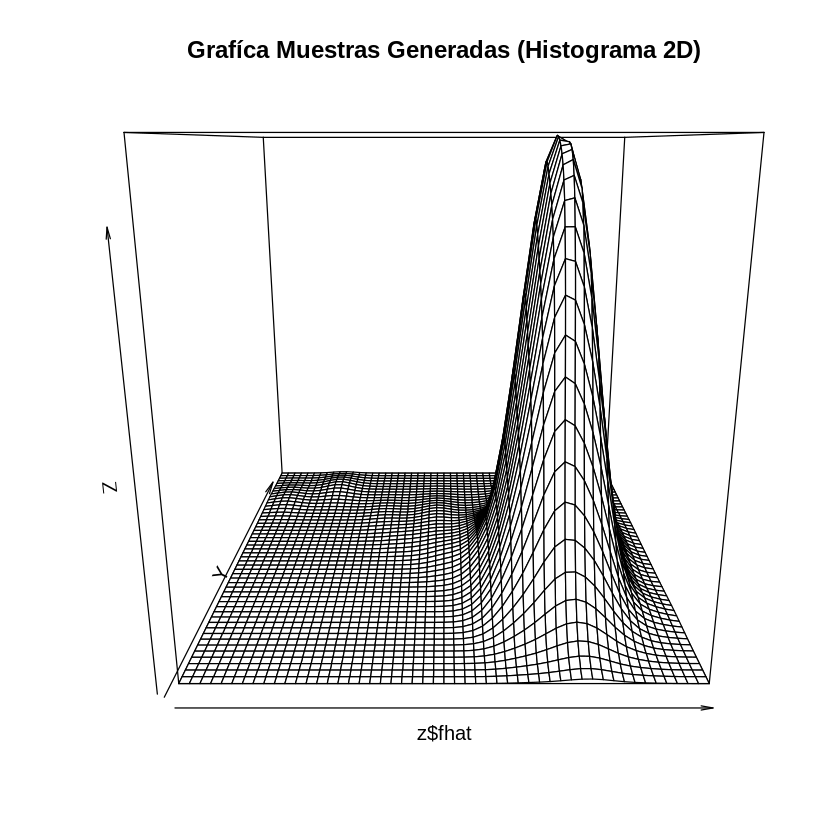

In [ ]:
require(KernSmooth)
df = data.frame(a,b)
z <- bkde2D(df, .5)
persp(z$fhat, main='Grafíca Muestras Generadas (Histograma 2D)')